# Upper Confidence Bound (UCB)

In [1]:
from IPython.core.display import Image, display
display(Image(url='http://www.aionlinecourse.com/uploads/tutorials/2018/09/21_ucb_2.png', width=500, unconfined=True))


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [4]:
import math
N = 10000 #600
d = 10
ads_selected = [] # contains all the ads(i) value with max upper bound in for each user

numbers_of_selections = [0] * d # for the formula
sums_of_rewards = [0] * d # Ri(n), for the formula

total_reward = 0 #actually not needed for this calculation

for n in range(0, N):
    
    ad = 0 # will be replaced by ad(i) which has max upper bound
    max_upper_bound = 0 # reset upper bound for every user
    
    for i in range(0, d):
        
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]   #ri'(n)
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) # delta
            upper_bound = average_reward + delta_i # upper bound of confidence interval
            
        else:
            upper_bound = 1e400 # for first #d users set the max bound as inf
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound  # changing max_upper_bound value for current user
            
            ad = i # for current user which ad is selected
            
    ads_selected.append(ad) # the selected value will be appended to the selected ad list
    
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1 # incrementing number of selections by one
    
    reward = dataset.values[n, ad] # reward got from the ad by nth user
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward 
    
    
    total_reward = total_reward + reward #actually not needed for this calculation

## Visualising the results

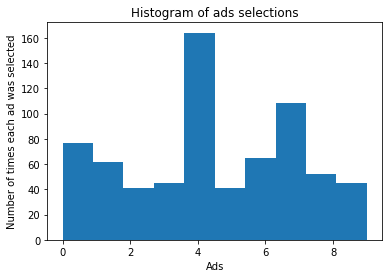

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()